<a href="https://colab.research.google.com/github/Armina101/postpartum-depression-backup/blob/main/postpartum_depression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Pre-processing**

## **Importing all needed libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **Read Dataset**

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Armina101/Postpartum-depression-prediction-model/refs/heads/main/THP_clean.csv')

In [3]:
df.head()

,newid,interviewer,uc,grandmother,employed_mo,income_mo,income_hh,genhealth,edu_mo,edu_fa,...,infantdev_1y,infantdev_1y_f,parentinputs_infancy,parentinputs_infancy_f,infantdev,infantdev_f,motherfinancial_7y,motherfinancial_7y_f,socialsupport,socialsupport_f
0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,7.319728,...,-1.550027,-0.914190,0.845854,0.341055,-1.155602,-0.975243,NaN,NaN,1.496326,NaN
1,226.0,1.0,1,No,No,0.0,60.0,Very good,0.0,8.000000,...,0.919651,0.044339,2.737210,0.550107,0.587643,0.244921,-0.064279,-0.346433,2.569177,1.731267
2,222.0,6.0,1,Yes,No,0.0,200.0,Moderate,7.0,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.521870,-0.295887,1.275779,NaN
3,3.0,1.0,1,No,No,0.0,150.0,Good,0.0,5.000000,...,1.589225,0.971888,0.634669,0.429139,0.326545,0.626777,0.521984,-0.163072,-0.521288,-0.880748
4,217.0,3.0,1,No,No,0.0,250.0,0,5.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.521984,-0.163072,1.275779,NaN


In [4]:
df.tail()

,newid,interviewer,uc,grandmother,employed_mo,income_mo,income_hh,genhealth,edu_mo,edu_fa,...,infantdev_1y,infantdev_1y_f,parentinputs_infancy,parentinputs_infancy_f,infantdev,infantdev_f,motherfinancial_7y,motherfinancial_7y_f,socialsupport,socialsupport_f
1198,546.0,5.0,40,Yes,No,0.0,150.0,Very good,0.0,10.000000,...,-0.213161,-0.325892,0.746556,0.541312,0.176705,-0.694231,-0.064279,-0.346433,0.204220,-0.035893
1199,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,7.319728,...,-0.315063,-0.402695,0.425044,NaN,0.903029,0.132893,NaN,NaN,-0.025040,NaN
1200,594.0,5.0,40,Yes,No,0.0,80.0,Moderate,4.0,7.000000,...,1.145054,0.341715,0.746556,0.541312,1.455266,0.502727,0.521984,-0.163072,0.747689,0.313829
1201,568.0,5.0,40,No,Yes,NaN,NaN,Good,5.0,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.449251,NaN,-0.380235,NaN
1202,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,7.319728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Sanity check of data**

In [5]:
df.shape

(1203, 394)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Columns: 394 entries, newid to socialsupport_f
dtypes: float64(366), int64(11), object(17)
memory usage: 3.6+ MB


In [7]:
#checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [8]:
#checking for garbage values
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("***"*10)

grandmother
No     538
Yes    347
Name: count, dtype: int64
******************************
employed_mo
No     781
Yes    104
Name: count, dtype: int64
******************************
genhealth
Good         364
Moderate     251
Very good    184
0             70
Bad           16
Name: count, dtype: int64
******************************
ideal_no_kids
4     267
3     262
2     237
5      58
6      18
.d     11
7      10
1       9
8       8
0       4
Name: count, dtype: int64
******************************
mo_185
Yes    558
No     301
Name: count, dtype: int64
******************************
mo_358
not played at all    602
.25                  105
once or twice        102
.5                    56
.75                   20
Name: count, dtype: int64
******************************
mo_360
Yes    517
No     368
Name: count, dtype: int64
******************************
ch_27
Yes    704
No     170
Name: count, dtype: int64
******************************
ch_28
Yes    744
No     130
Name: count, dtype: i

## **Exploratory Data Analysis**

In [9]:
#descriptive statistics
df.describe()

,newid,interviewer,uc,income_mo,income_hh,edu_mo,edu_fa,no_kids_over5_dead,no_kids_1_5_dead,no_kids_less1_dead,...,infantdev_1y,infantdev_1y_f,parentinputs_infancy,parentinputs_infancy_f,infantdev,infantdev_f,motherfinancial_7y,motherfinancial_7y_f,socialsupport,socialsupport_f
count,885.000000,885.000000,1203.000000,876.000000,756.000000,885.000000,1203.000000,882.000000,881.000000,881.000000,...,712.000000,7.080000e+02,816.000000,5.860000e+02,740.000000,7.030000e+02,885.000000,8.500000e+02,1120.000000,5.840000e+02
mean,446.225989,4.672316,20.358271,4.332192,141.707143,4.532203,7.319728,0.020408,0.037457,0.254257,...,0.202339,7.455650e-10,0.185357,-3.583618e-09,0.133936,1.593172e-10,0.177863,4.270588e-09,0.346108,1.469041e-09
std,256.597500,2.254451,11.440891,15.539970,116.350589,4.182804,3.226069,0.141472,0.217851,0.622537,...,0.986870,8.181502e-01,1.191635,9.470208e-01,1.007829,9.371984e-01,1.047386,8.890144e-01,1.083957,7.565686e-01
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.269506,-4.648146e+00,-4.007296,-2.417459e+00,-3.322134,-4.993645e+00,-1.108133,-4.792471e-01,-2.809055,-2.106218e+00
25%,225.000000,3.000000,10.000000,0.000000,70.000000,0.000000,7.000000,0.000000,0.000000,0.000000,...,-0.481443,-4.741491e-01,-0.516389,2.669969e-01,-0.541004,-5.238761e-01,-1.108133,-4.792471e-01,-0.380235,-5.160580e-01
50%,447.000000,5.000000,20.000000,0.000000,100.000000,5.000000,7.319728,0.000000,0.000000,0.000000,...,0.281445,2.411396e-02,0.260971,4.462136e-01,0.206483,2.035729e-02,0.521984,-1.630720e-01,0.385548,1.932745e-02
75%,668.000000,6.000000,30.000000,0.000000,180.000000,8.000000,10.000000,0.000000,0.000000,0.000000,...,0.969147,5.129925e-01,0.746556,5.413125e-01,0.876496,6.015202e-01,0.521984,-1.630720e-01,1.095594,5.129678e-01
max,889.000000,9.000000,40.000000,100.000000,800.000000,18.000000,16.000000,1.000000,3.000000,6.000000,...,2.511270,2.217049e+00,3.995981,7.250453e-01,2.439257,2.655170e+00,4.615942,4.415358e+00,2.739945,1.797304e+00


In [10]:
df.describe(include='object')

,grandmother,employed_mo,genhealth,ideal_no_kids,mo_185,mo_358,mo_360,ch_27,ch_28,ch_29,ch_30,ch_31,ch_32,ch_33,ch_34,ch_35,ch_36
count,885,885,885,884,859,885,885,874,874,874,874,874,874,874,874,874,850
unique,2,2,5,10,2,5,2,2,2,2,2,2,2,2,2,2,2
top,No,No,Good,4,Yes,not played at all,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Yes
freq,538,781,364,267,558,602,517,704,744,476,507,793,814,857,581,598,431


In [11]:
#target class name
input_target_class = "hamd_6m"

#columns to be removed
input_columns_to_remove = []

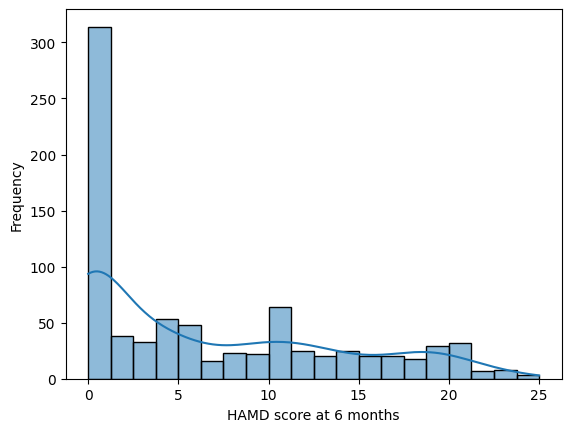

In [12]:
#checking distribution of target class
sns.histplot(df[input_target_class], bins=20, kde=True)
plt.xlabel("HAMD score at 6 months")
plt.ylabel("Frequency")
plt.show()

The histogram shows the distribution of the target variable "hamd_6m". Most values are clustered at the lower end of the scale but there are also a few high scores which translates to severe postpartum depression.

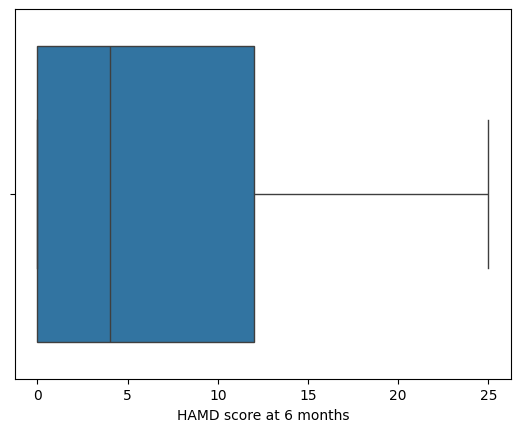

In [13]:
sns.boxplot(x=df[input_target_class])
plt.xlabel("HAMD score at 6 months")
plt.show()

The boxplot shows concentration of scores around the lower range and also some outliers which translates to more severe cases of postpartum depression. This shows that the dataset is somewhat skewed towrads lower scores.

In [14]:
#checking value counts
print(df[input_target_class].value_counts().sort_index())

hamd_6m
0.0     282
1.0      32
2.0      38
3.0      33
4.0      53
5.0      26
6.0      22
7.0      16
8.0      23
9.0      22
10.0     34
11.0     30
12.0     25
13.0     20
14.0     25
15.0      8
16.0     12
17.0     20
18.0     18
19.0     29
20.0     20
21.0     12
22.0      7
23.0      8
24.0      2
25.0      1
Name: count, dtype: int64


Lets check the percentage of missing values in the target class "hamd_6m" and then we'll proceed to drop them before transformation or training the model.

In [15]:
#checking percentage of missing values in the target class
df["hamd_6m"].isnull().mean() * 100

np.float64(32.00332502078138)

In [16]:
# checking missing count
print("Missing target values:", df["hamd_6m"].isnull().sum())

# dropping rows where target is missing
df = df.dropna(subset=["hamd_6m"])

print("New shape after dropping missing targets:", df.shape)

Missing target values: 385
New shape after dropping missing targets: (818, 394)


Target class completed, moving on to x (independent variables)

## **Fixing Garbage Values**

In [17]:
#checking for garbage values
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("***"*10)

grandmother
No     371
Yes    213
Name: count, dtype: int64
******************************
employed_mo
No     518
Yes     66
Name: count, dtype: int64
******************************
genhealth
Good         236
Moderate     147
Very good    140
0             53
Bad            8
Name: count, dtype: int64
******************************
ideal_no_kids
4     183
3     173
2     150
5      37
6      11
.d     10
7       7
1       5
8       4
0       3
Name: count, dtype: int64
******************************
mo_185
Yes    351
No     216
Name: count, dtype: int64
******************************
mo_358
not played at all    409
.25                   67
once or twice         65
.5                    34
.75                    9
Name: count, dtype: int64
******************************
mo_360
Yes    338
No     246
Name: count, dtype: int64
******************************
ch_27
Yes    458
No     117
Name: count, dtype: int64
******************************
ch_28
Yes    490
No      85
Name: count, dtype: i

From the value counts, I observed that the columns; genhealth, mo_358, and ideal_no_kids contain irregular and garbage values. These values will be cleaned/replaced in the next step to ensure consistency in the data.

In [18]:
#replacing '0' with NaN
df['genhealth'] = df['genhealth'].replace("0", np.nan)
df['ideal_no_kids'] = df['ideal_no_kids'].replace("0", np.nan)
df['ideal_no_kids'] = pd.to_numeric(df['ideal_no_kids'], errors='coerce')

In [19]:
#mapping text responses to numeric values
#and converting column type into numeric type
mapping = {
   "not played at all": 0.0,
   "once or twice": 0.25
}
df["mo_358"] = df["mo_358"].replace(mapping)
df["mo_358"] = pd.to_numeric(df["mo_358"], errors="coerce")

Now let's recheck to be sure we treated those garbage values

In [20]:
#rechecking for garbage values
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("***"*10)

grandmother
No     371
Yes    213
Name: count, dtype: int64
******************************
employed_mo
No     518
Yes     66
Name: count, dtype: int64
******************************
genhealth
Good         236
Moderate     147
Very good    140
Bad            8
Name: count, dtype: int64
******************************
mo_185
Yes    351
No     216
Name: count, dtype: int64
******************************
mo_360
Yes    338
No     246
Name: count, dtype: int64
******************************
ch_27
Yes    458
No     117
Name: count, dtype: int64
******************************
ch_28
Yes    490
No      85
Name: count, dtype: int64
******************************
ch_29
No     323
Yes    252
Name: count, dtype: int64
******************************
ch_30
No     337
Yes    238
Name: count, dtype: int64
******************************
ch_31
Yes    518
No      57
Name: count, dtype: int64
******************************
ch_32
Yes    532
No      43
Name: count, dtype: int64
******************************
c

## **Missing Values Treatment**

In [21]:
df.isnull().sum()

,0
newid,234
interviewer,234
uc,0
grandmother,234
employed_mo,234
...,...
infantdev_f,115
motherfinancial_7y,234
motherfinancial_7y_f,257
socialsupport,0


In [22]:
# checking for columns with high missingness
pd.set_option('display.max_rows', None)
missing_percent = df.isnull().sum() / df.shape[0] * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

relation_traj_f           55.623472
relationshipindex_f       55.501222
relationship_inlaw        54.767726
age_kid1                  54.156479
days_healthy              47.555012
motherhealthindex_f       47.555012
fatherfinancial_f         45.110024
expend_food               43.765281
ln_income_fa              42.053790
expend_educ               39.853301
ln_expend_educ            39.853301
expend_med                39.731051
incomeindex_f             39.242054
income_hh                 38.753056
mo_358                    36.552567
genhealth                 35.085575
motherfinancial_f         31.540342
schoolqual_pca            31.418093
motherfinancial_7y_f      31.418093
ch_36                     31.418093
nonviolent                30.684597
relationship_husb         30.684597
maritalscale              30.684597
mo_185                    30.684597
cognindex_f               30.562347
ideal_no_kids             30.317848
fertility_vars_f          29.951100
relationshipindex         29

Let's drop columns with missingness greater than 40% to reduce noise and avoid bias

In [23]:
# columns to drop (greater than 40% missing)
cols_to_drop = missing_percent[missing_percent > 40].index

print(f"Number of columns to drop: {len(cols_to_drop)}")
print("Columns:", cols_to_drop.tolist())

# dropping them
df = df.drop(columns=cols_to_drop)

print("New shape:", df.shape)

Number of columns to drop: 9
Columns: ['relation_traj_f', 'relationshipindex_f', 'relationship_inlaw', 'age_kid1', 'days_healthy', 'motherhealthindex_f', 'fatherfinancial_f', 'expend_food', 'ln_income_fa']
New shape: (818, 385)


Now that I've dropped the columns with greater than 40% missingness, I'll treat the other missing values; numerical columns will be filled with median while categorical columns will be filled with mode to avoid losing too much data.

In [24]:
# Separate column types
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

Let's check for missing values again to confirm if the imputation worked

In [25]:
#checking for missing values
print(df.isnull().sum().sum())

0


It did!
Now moving on...

## **Outlier Treatment**

Outliers can cause biased model training and affect accuracy. Let's check how many outliers exist in the numerical columns.

In [26]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate IQR for each numeric column
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers in each column
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).sum()
print("Number of outliers per column:\n", outliers[outliers > 0])

Number of outliers per column:
 income_mo                      59
income_hh                     173
edu_mo                          6
edu_fa                        118
ideal_no_kids                  27
no_kids_over5_dead             14
no_kids_1_5_dead               22
no_kids_less1_dead            117
mo_358                        110
c_wt                          107
c_ht                           71
mo_ht                           2
mo_bmi                         21
kids_no                        16
bdq_6m                          6
ses_6m                          5
c_wt_6m                        24
c_ht_6m                        20
ses_1y                          3
pregnant_12m                   63
c_wt_1y                        28
c_ht_1y                        16
play_mo_1y                     16
play_fa_1y                     24
var618                        133
var619                        156
var620                        137
c_age_int                      82
vci             

In [27]:
# Separate numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Split into continuous vs discrete numeric columns
cont_cols = [col for col in num_cols if df[col].nunique() > 10]
disc_cols = [col for col in num_cols if df[col].nunique() <= 10]

print("Continuous columns (outlier candidates):", cont_cols[:10], "...")
print("Discrete numeric columns (ignored for outliers):", disc_cols[:10], "...")

Continuous columns (outlier candidates): ['newid', 'uc', 'income_mo', 'income_hh', 'edu_mo', 'edu_fa', 'c_wt', 'c_ht', 'mo_ht', 'mo_bmi'] ...
Discrete numeric columns (ignored for outliers): ['interviewer', 'ideal_no_kids', 'no_kids_over5_dead', 'no_kids_1_5_dead', 'no_kids_less1_dead', 'mo_358', 'kids_no', 'var29', 'depressed_6m', 'ses_6m'] ...


To handle outliers, I will apply capping to replace extreme values with the upper and lower percentile thresholds.

In [28]:
# Function to cap outliers at 1st and 99th percentile
def cap_outliers(series, lower_q=0.01, upper_q=0.99):
    lower = series.quantile(lower_q)
    upper = series.quantile(upper_q)
    capped = np.where(series < lower, lower,
                      np.where(series > upper, upper, series))
    return capped, lower, upper

# Apply capping to all continuous numeric columns
capped_info = {}  # to store capping thresholds for reference

for col in cont_cols:
    original_min, original_max = df[col].min(), df[col].max()
    df[col], lower, upper = cap_outliers(df[col])
    capped_info[col] = (lower, upper, original_min, original_max)


Let's check how the values in each column were adjusted.

In [29]:
# Show summary of capped columns
print("\n🔎 Outlier capping summary:")
for col, (lower, upper, orig_min, orig_max) in list(capped_info.items())[:10]:  #first 10
    print(f"{col}: capped from [{orig_min}, {orig_max}] → [{lower}, {upper}]")


🔎 Outlier capping summary:
newid: capped from [1.0, 888.0] → [12.17, 872.4900000000001]
uc: capped from [1, 40] → [1.0, 40.0]
income_mo: capped from [0.0, 100.0] → [0.0, 60.0]
income_hh: capped from [0.0, 800.0] → [0.02, 541.500000000002]
edu_mo: capped from [0.0, 18.0] → [0.0, 12.0]
edu_fa: capped from [0.0, 16.0] → [0.0, 13.660000000000082]
c_wt: capped from [8.5, 37.099998] → [14.302, 29.712999830000044]
c_ht: capped from [86.360001, 160.02] → [106.68, 134.62]
mo_ht: capped from [1.38, 1.74] → [1.44, 1.6983000000000004]
mo_bmi: capped from [15.39999961853027, 46.90000152587891] → [16.916999683380123, 36.94900012969972]


## **Skewness Correction**

Let's check skewness

In [30]:
df[cont_cols].skew().sort_values(ascending=False)

,0
income_mo,4.624160
childmort_f,3.632784
motherfinancial_f,3.531073
motherfinancial_7y_f,3.520105
expend_med,3.288491
income_hh,2.715937
expend_educ,2.640236
panic,2.465422
obc,2.357602
depindex_7y,2.351167


Let's define the skewed columns (excluding categorical columns) so we can transform them.

In [31]:
from scipy.stats import skew

# calculate skewness and store it
cont_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns
             if df[col].nunique() > 10]   # crude filter: at least 10 unique values

# calculate skewness only on continuous cols
skewness = df[cont_cols].apply(skew).sort_values(ascending=False)

# filter
highly_skewed = skewness[skewness > 1].index
neg_skewed = skewness[skewness < -1].index

Now, I'll fix the highly skewed columns

In [32]:
from sklearn.preprocessing import PowerTransformer

# Select highly skewed positive features
highly_skewed = skewness[(skewness > 1) & (skewness.index != 'income_mo')].index
pt = PowerTransformer(method='yeo-johnson')
df[highly_skewed] = pt.fit_transform(df[highly_skewed])

Next, the negatively skewed columns

In [33]:
# Select highly negatively skewed features
neg_skewed = skewness[skewness < -1].index
pt = PowerTransformer(method='yeo-johnson')
df[neg_skewed] = pt.fit_transform(df[neg_skewed])

Now I'll check to see if the transformation worked

In [34]:
new_skewness = df[highly_skewed].skew().sort_values(ascending=False)

print("📉 Skewness after Yeo-Johnson transformation:")
print(new_skewness)

📉 Skewness after Yeo-Johnson transformation:
childmort_f             1.049825
panic                   0.733396
depindex_7y             0.688164
income_hh               0.332712
doi0Xtreat              0.297418
depindex_7y_f           0.120098
social_phobia           0.080348
spence                  0.076426
expend_educ             0.059322
expend_med              0.056122
mo_wt_6m                0.028102
var416                  0.024725
class_size              0.021406
age_sq                 -0.005194
gad                    -0.007019
motherfinancial_7y_f   -0.048157
emoindex_f             -0.069024
motherfinancial_f      -0.084379
dtype: float64


Let's fix the income_mo column, first I'll create a copy of the income_mo variable to avoid multiple transformations.



In [35]:
#making a backup column before doing transformations
df['income_mo_original'] = df['income_mo'].copy()

/tmp/ipython-input-3365206955.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['income_mo_original'] = df['income_mo'].copy()


In [36]:
#a copy of the original column
income = df['income_mo_original'].copy()

#cap at 90th percentile
cap = income.quantile(0.90)
income = income.clip(upper=cap)

#log transform
income = np.log1p(income)

print("Skew after fixing income_mo:", income.skew())

#to replace in df only once
df['income_mo'] = income

Skew after fixing income_mo: 0.0


Now the skewness has been fixed.

## **Encoding**

Since linear regression can only work with numeric inputs, I'll encode and convert all categorical variables to numbers

In [41]:
#to select categorical columns automatically
cat_cols = df.select_dtypes(include=['object', 'category']).columns

#to apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)  # drop_first avoids dummy variable trap

print("Shape before encoding:", df.shape)

#rename back
df = df_encoded.copy()
print("Shape after encoding:", df.shape)

Shape before encoding: (818, 386)
Shape after encoding: (818, 388)


Let's drop some obvious identifiers

In [52]:
identifiers = ['newid', 'interviewer']
df = df.drop(columns=[col for col in identifiers if col in df.columns], inplace=True)

Now let's check for multicollinearity

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Take only numeric features
X = df.drop(columns=['hamd_6m'])
X = X.select_dtypes(include=[np.number])

X = X.fillna(0)  # Replace NaN with 0

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False).head(20))  # top 20 features by VIF

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


             Feature  VIF
148           lhw_61  inf
303     notdepressed  inf
149           lhw_62  inf
152           lhw_65  inf
145           lhw_58  inf
146           lhw_59  inf
153           lhw_66  inf
174  edu_lvl_mo_7y_3  inf
151           lhw_64  inf
100           lhw_13  inf
88             lhw_1  inf
82         intervr_4  inf
87         intervr_9  inf
86         intervr_8  inf
93             lhw_6  inf
90             lhw_3  inf
91             lhw_4  inf
92             lhw_5  inf
109           lhw_22  inf
104           lhw_17  inf


Let's try to remove constant columns

In [43]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0)  # remove all-zero-variance features
df = pd.DataFrame(selector.fit_transform(df), columns=df.columns[selector.get_support()])

And then recheck

In [45]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                        Feature           VIF
0                         newid  1.420745e+02
1                   interviewer  1.501200e+14
2                            uc  5.901271e+00
3                     income_mo           NaN
4                     income_hh  6.033391e+00
5                        edu_mo  4.832009e+01
6                        edu_fa  4.753203e+00
7                 ideal_no_kids  8.389606e+00
8            no_kids_over5_dead  3.701504e+00
9              no_kids_1_5_dead  3.123674e+00
10           no_kids_less1_dead  9.461675e+00
11                       mo_358  2.607545e+00
12                         c_wt  2.366683e+01
13                         c_ht  7.726803e+01
14                        mo_ht  2.633397e+00
15                       mo_bmi  5.974164e+00
16                hamd_baseline  5.242215e+02
17                 bdq_baseline  4.909962e+02
18              edu_mo_baseline  5.382243e+02
19              edu_fa_baseline  4.497704e+02
20                      kids_no  1

## **Scaling and Normalization**

Now, I'll normalize all features using the StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df_scaled.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(
    df_scaled.select_dtypes(include=['float64', 'int64'])
)

In [ ]:
#histogram to understand the distribution
#import warnings
#warnings.filterwarnings('ignore')
#for i in df.select_dtypes(include='number').columns:
  #sns.histplot(data=df, x=i)
  #plt.show()